In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2018.csv


In [5]:
df = pd.concat(map(pd.read_csv, ['/kaggle/input/world-happiness/2017.csv']))

In [6]:
df

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [7]:
df.isnull().any()

Country                          False
Happiness.Rank                   False
Happiness.Score                  False
Whisker.high                     False
Whisker.low                      False
Economy..GDP.per.Capita.         False
Family                           False
Health..Life.Expectancy.         False
Freedom                          False
Generosity                       False
Trust..Government.Corruption.    False
Dystopia.Residual                False
dtype: bool

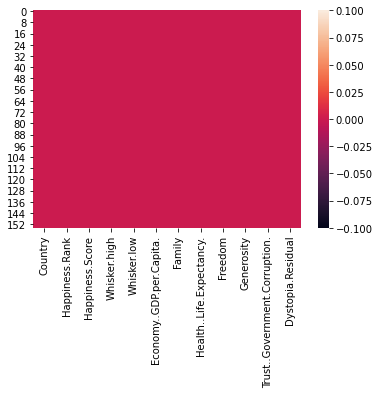

In [8]:
import seaborn as sns
sns.heatmap(df.isnull())

We don't have any empty field

In [9]:
df.shape

(155, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [11]:
df.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [12]:
df['Dystopia.Residual'].min()

0.37791371345520003

In [13]:
df.loc[df['Dystopia.Residual']==0.37791371345520003]

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
141,Botswana,142,3.766,3.874123,3.657877,1.122094,1.221555,0.341756,0.505196,0.099348,0.098583,0.377914


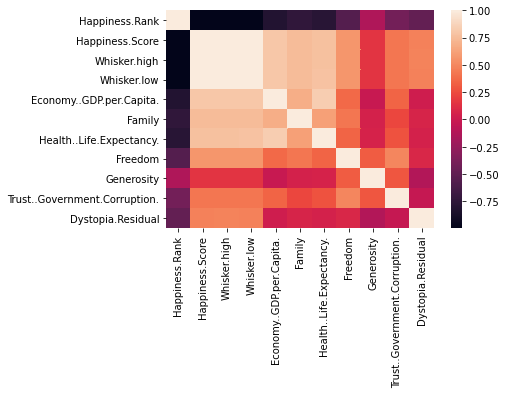

In [14]:
sns.heatmap(df.corr(),)

we will give more emphasise on happiness score rather than rank and would evaluate how factors are influecing it

TOP  things that heavily contribute to HAPPINESS SCORE are :
     GDP per captia , Life expectancy , Family
Least 5 things affecting HAPPINESS SCORE are :
    Generosity ,Govt Corruption , Dystopia Residual , Freedom

Whisker High and Whisker Low are just upper and lower bound of same datbase so they are not required

In [15]:
df = df.drop(['Whisker.high','Whisker.low'],axis=1)

In [16]:
df.head(2)

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


we will look at each column to see how things are affected

# GDP

Text(0.5, 1.0, 'GDP AND HAPPINESS')

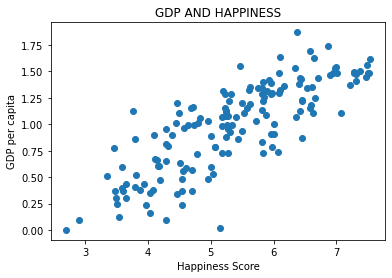

In [17]:
import matplotlib.pyplot as plt
plt.scatter(df['Happiness.Score'],df['Economy..GDP.per.Capita.'])
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')
plt.title('GDP AND HAPPINESS')

well this is clear relationship that more the money people have more happy they are

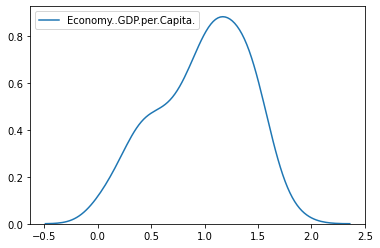

In [18]:
sns.kdeplot(df['Economy..GDP.per.Capita.'])

most of the countries have per capita GDP around 1.3

Text(0.5, 1.0, 'GDP AND HAPPINESS')

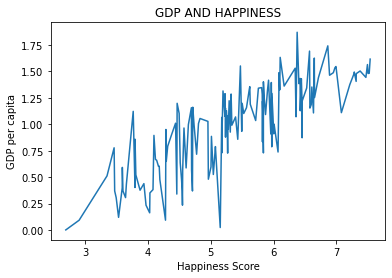

In [19]:
plt.plot(df['Happiness.Score'],df['Economy..GDP.per.Capita.'])
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')
plt.title('GDP AND HAPPINESS')

even though GDP and happiness are directly related but Highest Scores don't correspond to highest GDP

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6d00580590>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6d00588050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6d00578fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6d00588b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6d0058f090>],
 'means': []}

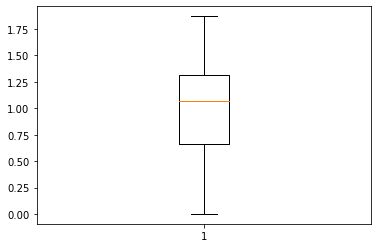

In [20]:
plt.boxplot(df['Economy..GDP.per.Capita.'])

Text(0.5, 1.0, 'GDP AND HAPPINESS')

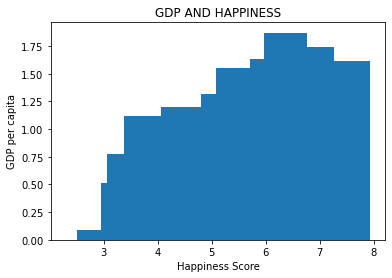

In [21]:
plt.bar(df['Happiness.Score'],df['Economy..GDP.per.Capita.'])
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')
plt.title('GDP AND HAPPINESS')

highest happiness score does not have highest GDP so other factors are also important to have a happy life not just money

Text(0, 0.5, 'Counts')

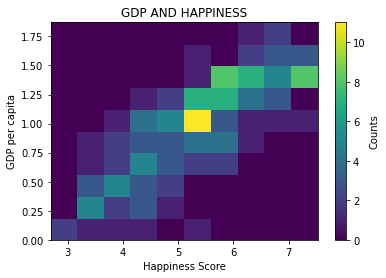

In [22]:
plt.hist2d(df['Happiness.Score'],df['Economy..GDP.per.Capita.'])
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')
plt.title('GDP AND HAPPINESS')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')

# LIFE EXPECTANCY

Text(0.5, 1.0, 'AGE AND HAPPINESS')

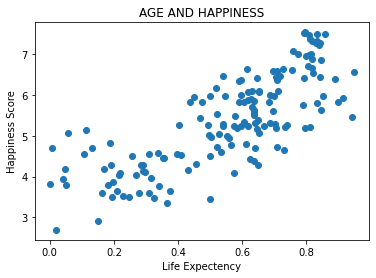

In [23]:
import matplotlib.pyplot as plt
plt.scatter(df['Health..Life.Expectancy.'],df['Happiness.Score'])
plt.xlabel('Life Expectency')
plt.ylabel('Happiness Score')
plt.title('AGE AND HAPPINESS')

well the more the people live , more happy they are

Text(0.5, 1.0, 'AGE AND HAPPINESS')

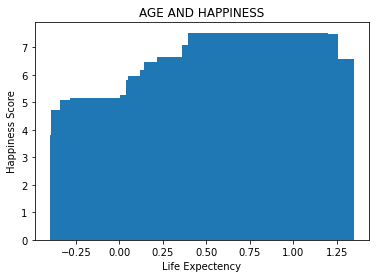

In [24]:
plt.bar(df['Health..Life.Expectancy.'],df['Happiness.Score'])
plt.xlabel('Life Expectency')
plt.ylabel('Happiness Score')
plt.title('AGE AND HAPPINESS')

well , life expectancy above ).5 and till 1.10 have same affect on Happiness , but again too less and too more life expectancy lowers the happiness

Text(0.5, 1.0, 'AGE AND HAPPINESS')

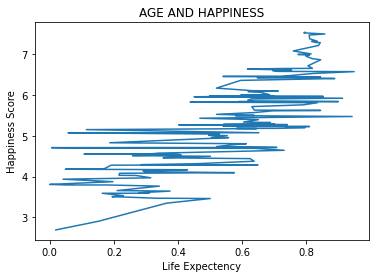

In [25]:
plt.plot(df['Health..Life.Expectancy.'],df['Happiness.Score'])
plt.xlabel('Life Expectency')
plt.ylabel('Happiness Score')
plt.title('AGE AND HAPPINESS')

well that's wavy , so basically happiness wiggles a lot around 0.4 and 0.6 so this is a factor but not a major factor 

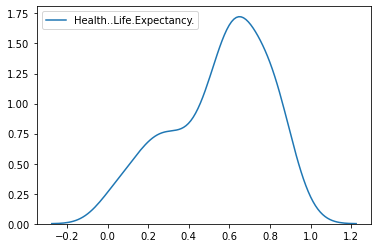

In [26]:
sns.kdeplot(df['Health..Life.Expectancy.'])

well , majority of life expectancies are between 0.6 and 0.8

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6d001b3150>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6d00238990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6d0018ded0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6d0016e4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6d005a4550>],
 'means': []}

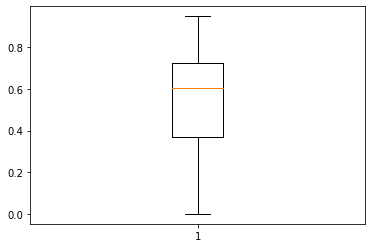

In [27]:
plt.boxplot(df['Health..Life.Expectancy.'])

# FAMILY

The Family column quantifies how happy people are when they are with Family , or when they are away from work place , let's explore this

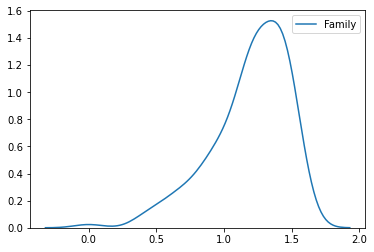

In [28]:
sns.kdeplot(df['Family'])

the quantifiable value is mostly around 1.3-1.4 of happiness when they are with their family , this is a thing that also depends in country to country

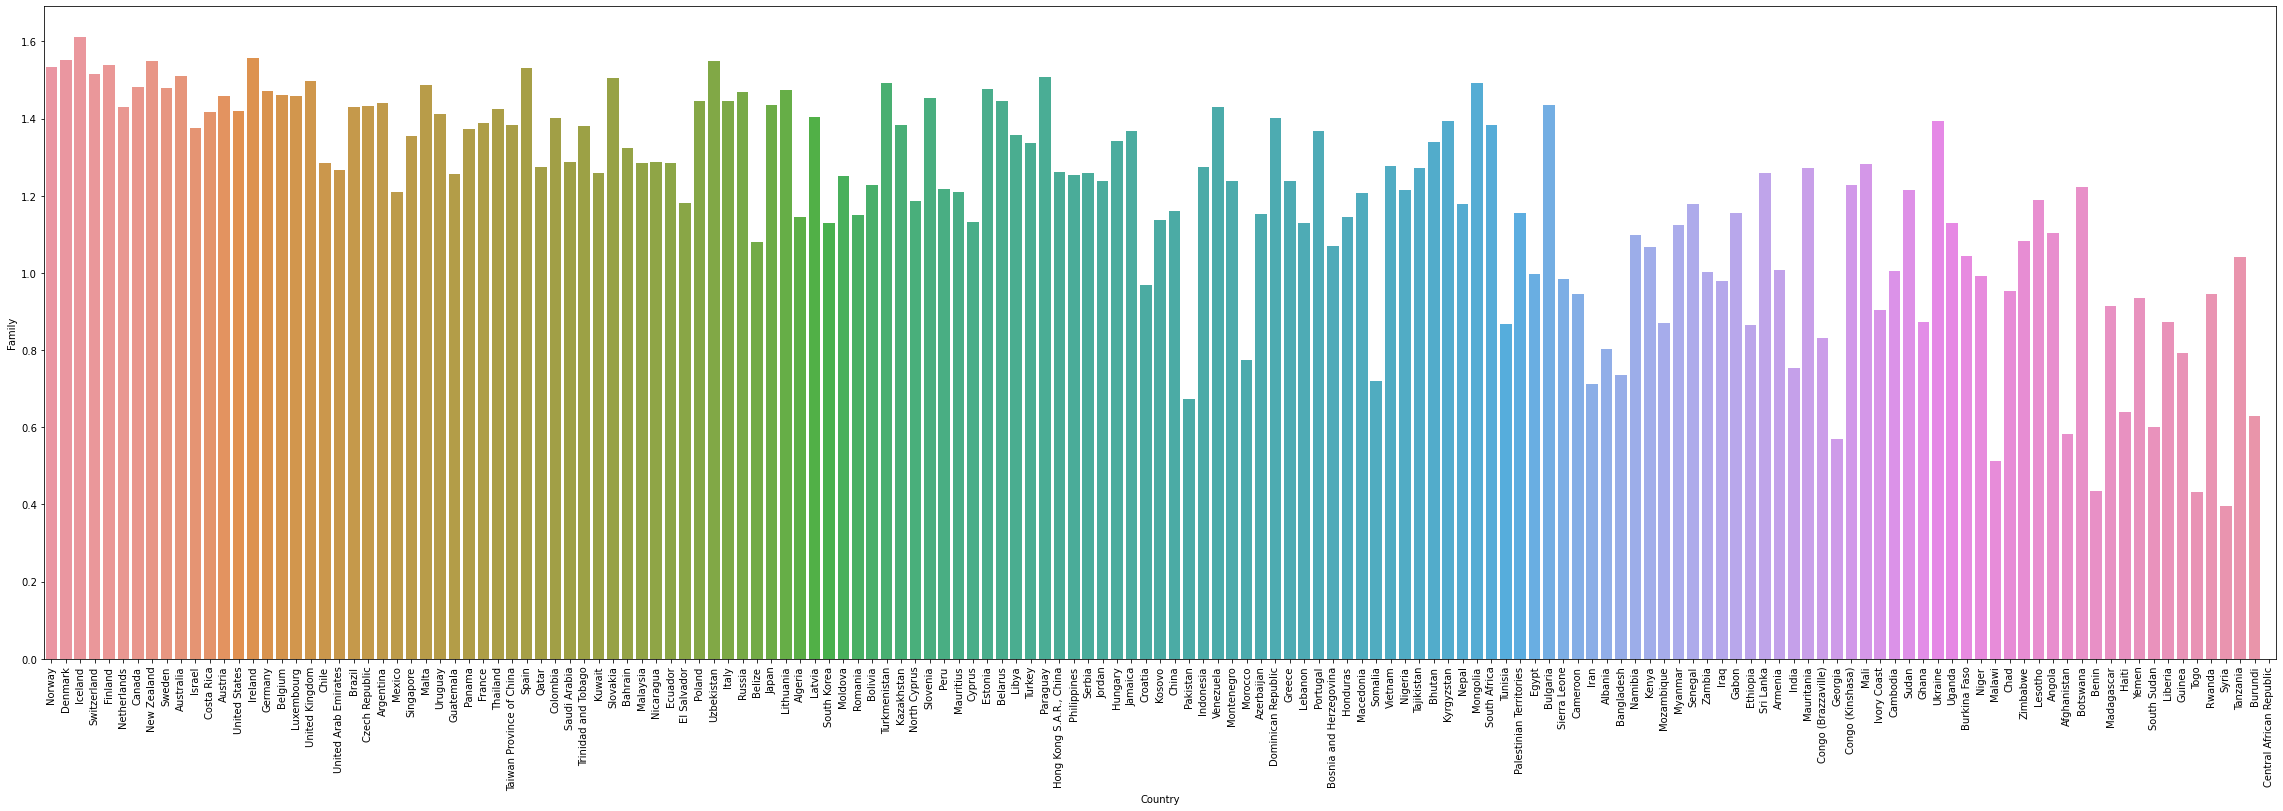

In [29]:
plt.figure(figsize = (40,12))
sns.barplot(x = 'Country',y='Family',data = df)
plt.xticks(rotation = 90)
plt.show()

Usually mostly happiness is directly proportional to  quality time people spend with their families but there are some exceptions
Netherlands have a top happiness score but it's family time is quite low , so in Netherlands people are happy but their interaction with family is not a important factor there 

In [37]:
df[(df['Happiness.Score'] > 6.5) & (df['Family']<1.3)]

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
19,Chile,20,6.652,1.252785,1.284025,0.819480,0.376895,0.326662,0.082288,2.509586
20,United Arab Emirates,21,6.648,1.626343,1.266410,0.726798,0.608345,0.360942,0.324490,1.734704
24,Mexico,25,6.578,1.153184,1.210862,0.709979,0.412730,0.120990,0.132774,2.837155


so only three countries have relatively lower Family value but quite good happiness score and two of them are in Southern America while one is in middile east

Text(0, 0.5, 'Happiness Score')

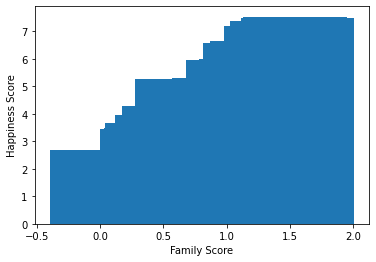

In [39]:
plt.bar(df['Family'],df["Happiness.Score"])
plt.xlabel('Family Score')
plt.ylabel('Happiness Score')

well after 1.3 Family Score , most of the countries have kinda same Happiness Score , people are happy after spending more quality time with their family members

Text(0, 0.5, 'Happiness Score')

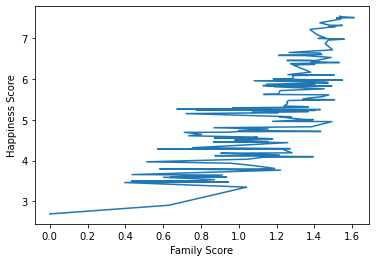

In [40]:
plt.plot(df['Family'],df["Happiness.Score"])
plt.xlabel('Family Score')
plt.ylabel('Happiness Score')

well , this clearly suggest time with family does not clearly mean happiness , especially between 0.8 and 1.4 , things are a lot changing

Text(0, 0.5, 'Happiness Score')

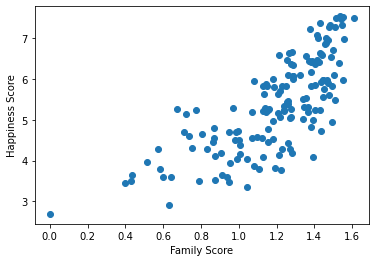

In [42]:
plt.scatter(df['Family'],df["Happiness.Score"])
plt.xlabel('Family Score')
plt.ylabel('Happiness Score')

This relationship is linear for sure 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6ceeecedd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6ceeed6890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6ceeece850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6ceeedb390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6ceeedb910>],
 'means': []}

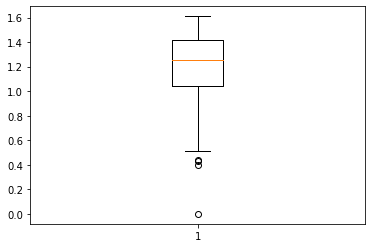

In [53]:
plt.boxplot(df['Family'])


# FREEDOM

SO Freedom here means that how much freedom people have in that country , that might depend on which type of government system is there

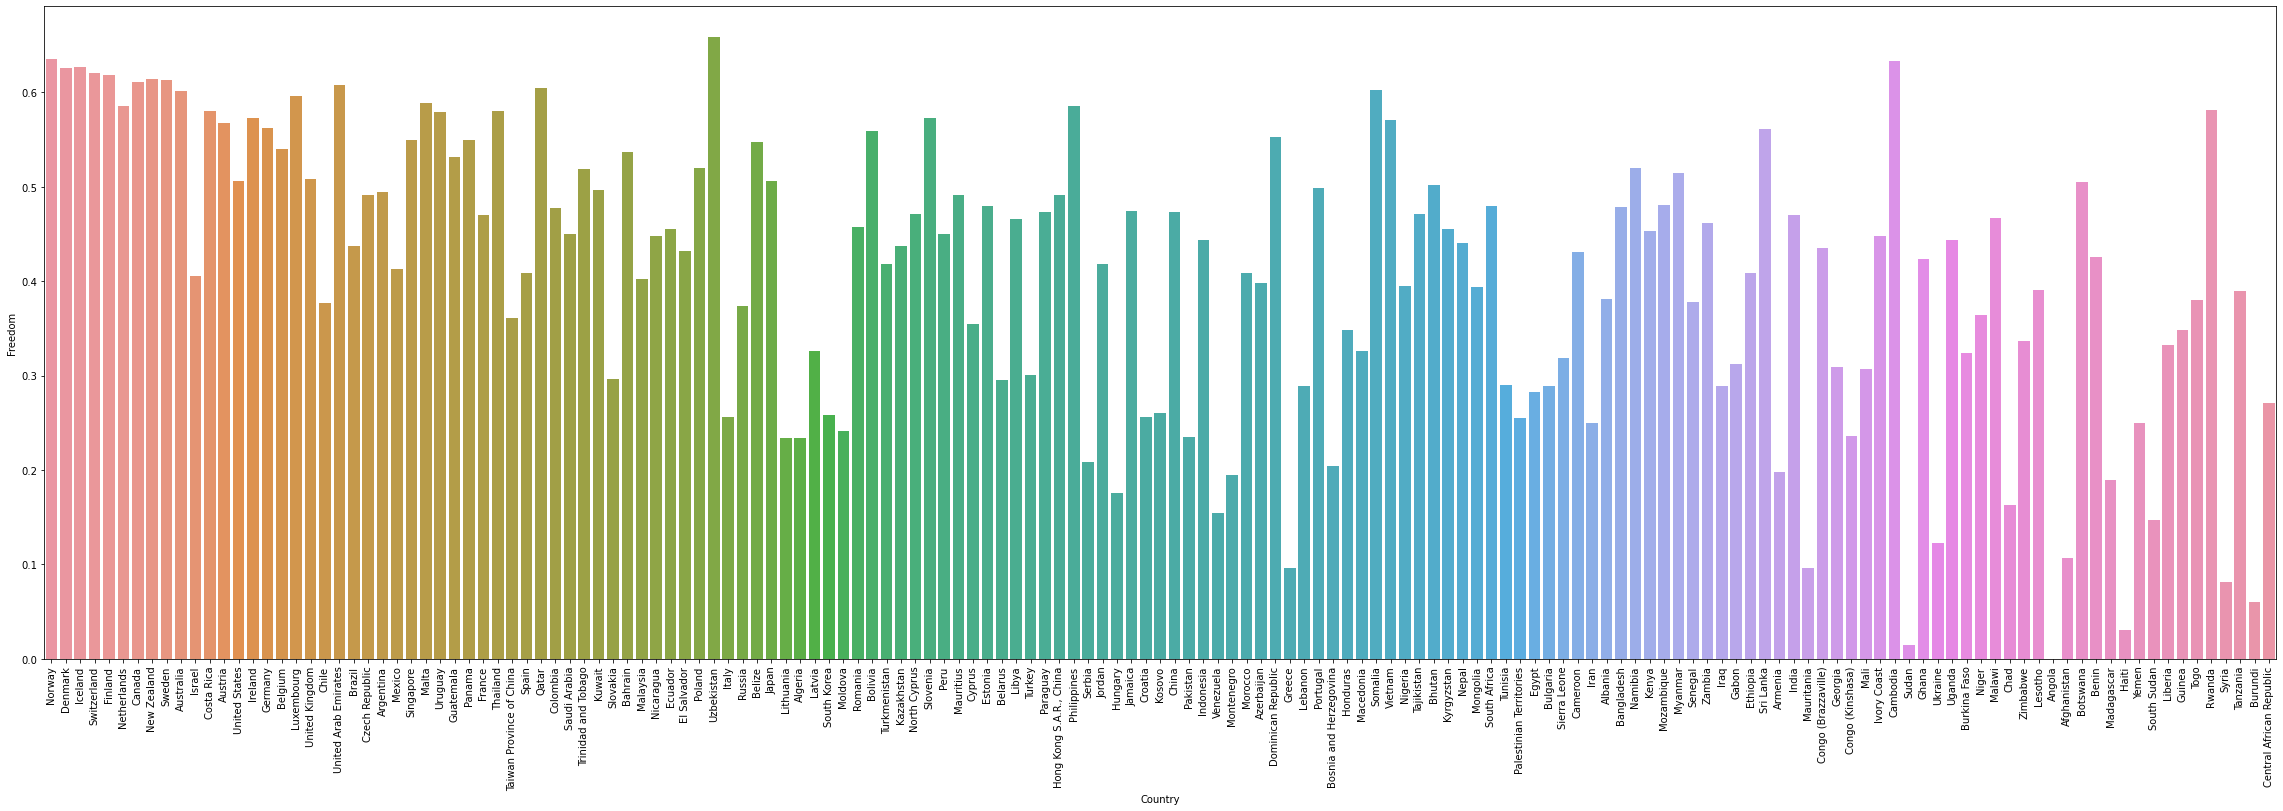

In [54]:
plt.figure(figsize = (40,12))
sns.barplot(x = 'Country',y='Freedom',data = df)
plt.xticks(rotation = 90)
plt.show()

well again it is a positive linear relationship of happiness and Freedom with sure some exceptions , CHILE and ISRAEL have low freedom but people are happy , while TOGO and CAMBODIA have good freedom still very low happiness

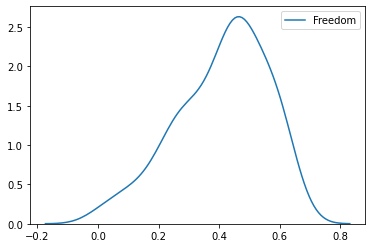

In [55]:
sns.kdeplot(df['Freedom'])

Well mostly Freedom is 0.5 (number that is to quantify freedom)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6cef20b2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6cef2486d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6cef210750>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6cef2784d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6cef278410>],
 'means': []}

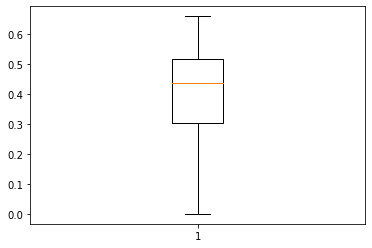

In [56]:
plt.boxplot(df['Freedom'])

Text(0, 0.5, 'Happiness Score')

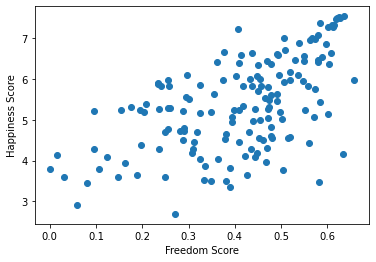

In [57]:
plt.scatter(df['Freedom'],df["Happiness.Score"])
plt.xlabel('Freedom Score')
plt.ylabel('Happiness Score')

once again this is a linear relationship , more the Freedom , more the exceptions but intersting point is there are cases of high FREEDOM but low HAPPINESS but it is never evident that low FREEDOM but high HAPPINESS

Text(0, 0.5, 'Happiness Score')

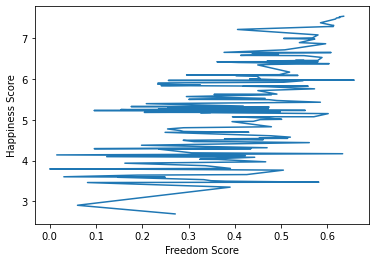

In [59]:
plt.plot(df['Freedom'],df["Happiness.Score"])
plt.xlabel('Freedom Score')
plt.ylabel('Happiness Score')

Text(0, 0.5, 'Happiness Score')

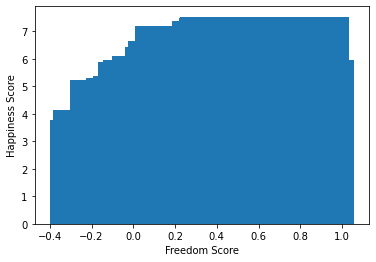

In [60]:
plt.bar(df['Freedom'],df["Happiness.Score"])
plt.xlabel('Freedom Score')
plt.ylabel('Happiness Score')

CORRUPTION

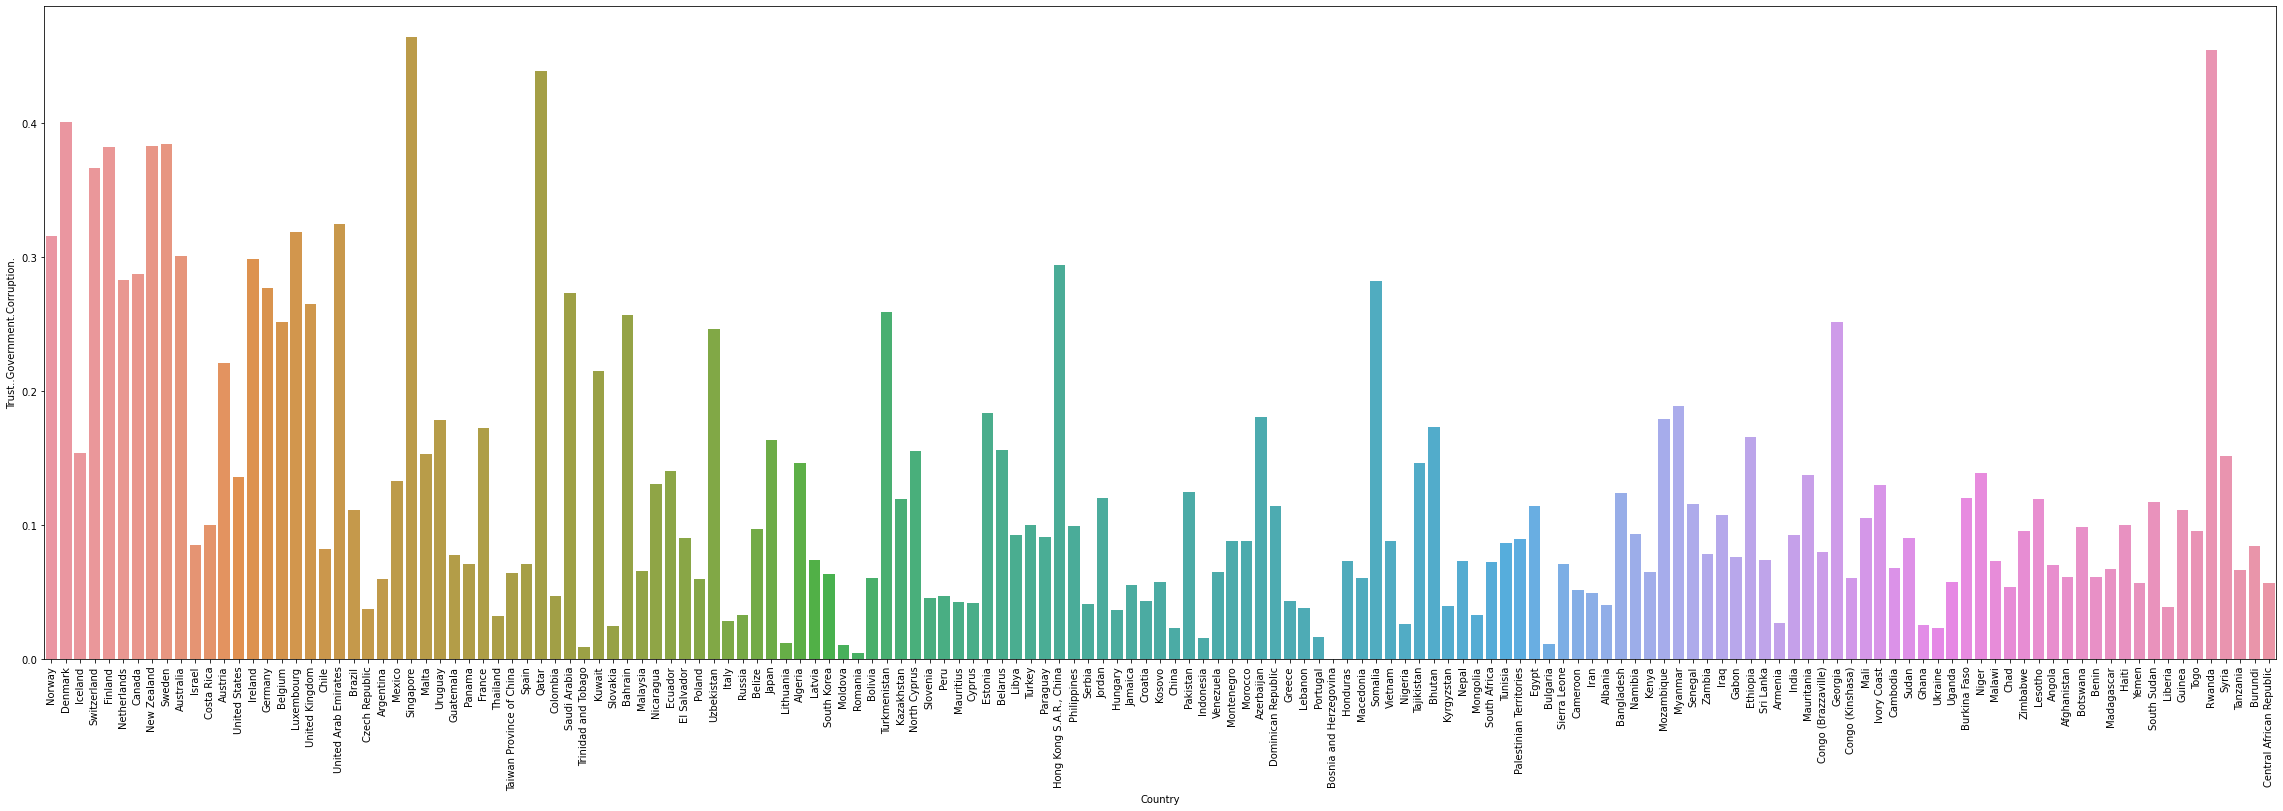

In [61]:
plt.figure(figsize = (40,12))
sns.barplot(x = 'Country',y='Trust..Government.Corruption.',data = df)
plt.xticks(rotation = 90)
plt.show()

Well Corruption matters but not that much in happiness of people 

Text(0.5, 1.0, 'Happines and Corruption')

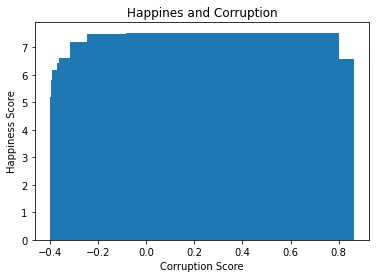

In [63]:
plt.bar(df['Trust..Government.Corruption.'],df["Happiness.Score"])
plt.xlabel('Corruption Score')
plt.ylabel('Happiness Score')
plt.title('Happines and Corruption')

As i mentioned , Corruption  is not such an important factor but when it is very high there is a Decline in happiness of people 

Text(0.5, 1.0, 'Happines and Corruption')

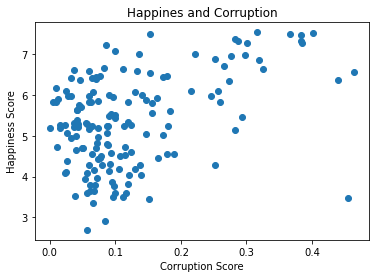

In [64]:
plt.scatter(df['Trust..Government.Corruption.'],df["Happiness.Score"])
plt.xlabel('Corruption Score')
plt.ylabel('Happiness Score')
plt.title('Happines and Corruption')

Text(0.5, 1.0, 'Happines and Corruption')

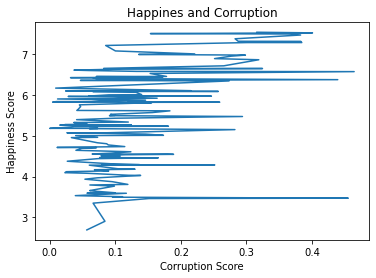

In [65]:
plt.plot(df['Trust..Government.Corruption.'],df["Happiness.Score"])
plt.xlabel('Corruption Score')
plt.ylabel('Happiness Score')
plt.title('Happines and Corruption')

It is not such a important feature that directly bothers the happiness

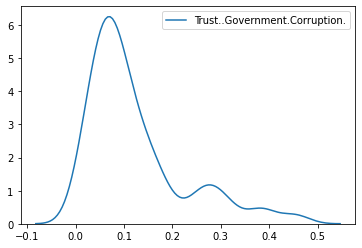

In [66]:
sns.kdeplot(df['Trust..Government.Corruption.'])

Corruption rate is about 0.1 in most countries

# MODELS

In [67]:
df.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual'],
      dtype='object')

In [68]:
x = df[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual']] #dependent Variables
y = df['Happiness.Score']

In [69]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Economy..GDP.per.Capita.       155 non-null    float64
 1   Family                         155 non-null    float64
 2   Health..Life.Expectancy.       155 non-null    float64
 3   Freedom                        155 non-null    float64
 4   Generosity                     155 non-null    float64
 5   Trust..Government.Corruption.  155 non-null    float64
 6   Dystopia.Residual              155 non-null    float64
dtypes: float64(7)
memory usage: 8.6 KB


All Numerical Values 

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=38)

Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)
linear.score(x_test,y_test)

0.999999920225304

We got an excellent model

In [75]:
y_pred = linear.predict(x_test)


Text(0, 0.5, 'Predicted Value')

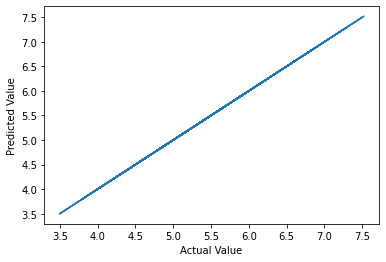

In [81]:
plt.plot(y_pred,y_test)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [83]:
df_test = pd.read_csv('/kaggle/input/world-happiness/2019.csv')
df_test.head(3)
#2019 data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [84]:
#this dataset is of 2019 with some additional features but we would check how relevant our model based on 2017 data is

In [85]:
test = np.array([1.340,1.587,0.986,0.596,0.153,0.393,2.430]).reshape(1,-1)
linear.predict(test)

array([7.48485295])

Family of 2017 is replaced by Social Support in 2019 and Dystopia residual i assumed is same as 2017 and we got 7.484(acc to 2017 model) score while it was 7.769 in 2019,not that bad i guess !